### Ejercicio de clasificación con Árboles de decisión
* Conjunto de datos: [Predicción de préstamos](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

##### Preparación

In [42]:
# Importar librerías de análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Definir un tema para graficar
sns.set_style('whitegrid')

##### Preprocesamiento

In [44]:
# Abrir el archivo
df = pd.read_csv('Loan Prection.csv', header=0, sep=',')
df.shape

(614, 13)

In [45]:
# Ver las primeras filas
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
# Ver la información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
# Contar el número de valores nulos por variable
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
# Ver el conteo por clase
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [49]:
# Convertir la columna "Loan_ID" en índice
df.set_index('Loan_ID', inplace=True)

In [50]:
# Convertir las columnas al tipo de dato adecuado
num_columns = df.columns[5:9]
cat_columns = [x for i, x in enumerate(df.columns.difference(num_columns)) if i!=4] 

df[num_columns] = df[num_columns].apply(lambda x: x.astype(float))
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))

In [51]:
# Reemplazar valores nulos
df.fillna(method='bfill', inplace=True)

In [52]:
# Ver el número de categorías por variable
df[df.select_dtypes('category').columns].nunique().reset_index(name='Cardinalidad')

,index,Cardinalidad
0,Gender,2
1,Married,2
2,Dependents,4
3,Education,2
4,Self_Employed,2
5,Credit_History,2
6,Property_Area,3


In [53]:
# Usar One Hot Encoding (crear variables dummy)
df = pd.get_dummies(df, drop_first=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849.0,0.0,128.0,360.0,1,0,0,0,0,0,0,1,0,1,1
LP001003,4583.0,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
LP001005,3000.0,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
LP001006,2583.0,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
LP001008,6000.0,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1


In [54]:
# Cambiar el nombre de la variable de etiquetas
df.rename(columns={'Loan_Status_Y': 'Loan_Status'}, inplace=True)
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Credit_History_1.0', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [55]:
# Separar en características (X) y etiquetas (Y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [56]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=99)
X_train.shape[0], X_test.shape[0]

(491, 123)

##### Ajustar el modelo de árbol de decisión

In [57]:
# Definir una malla de parámetros
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : np.arange(3, 15),
    'criterion' :['gini', 'entropy']
}

In [58]:
# Buscar los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(random_state=99)
grid = GridSearchCV(clf1, param_grid, cv=5, scoring='average_precision', n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=99), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['sqrt', 'log2']},
             return_train_score=True, scoring='average_precision', verbose=1)

In [59]:
# Ver el resultado del mejor modelo
print('Precisión: %.2f%%' % (grid.best_score_*100))
print(grid.best_params_)

Precisión: 79.84%
{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt'}


In [60]:
# Entrenar el modelo
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=14, ccp_alpha=0.01, max_features='sqrt', random_state=99)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=14,
                       max_features='sqrt', random_state=99)

In [61]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_pred = clf1.predict(X_test)
print('Precisión: %.2f%%' % (accuracy_score(y_test, y_pred)*100))
print('Precisión balanceada: %.2f%%' % (balanced_accuracy_score(y_test, y_pred)*100))

Precisión: 72.36%
Precisión balanceada: 60.37%


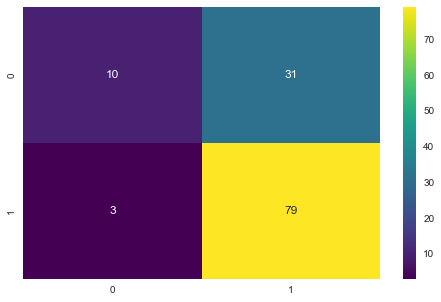

In [62]:
# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.show()

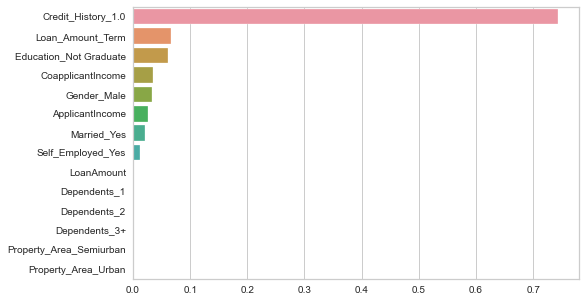

In [63]:
# Graficar la importancia de las variables
weights = pd.Series(clf1.feature_importances_, index=X.columns)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=weights.values, y=weights.index, ax=ax, order=weights.sort_values(ascending=False).index);

c:\Users\frpm0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


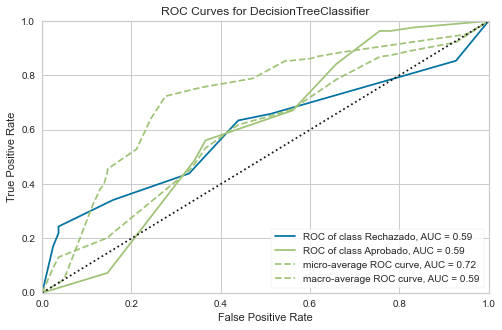

In [64]:
# Graficar la curva ROC
from yellowbrick import ROCAUC

fig, ax = plt.subplots(figsize=(8, 5))
visualizer = ROCAUC(clf1, classes=['Rechazado', 'Aprobado'], ax=ax)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [74]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

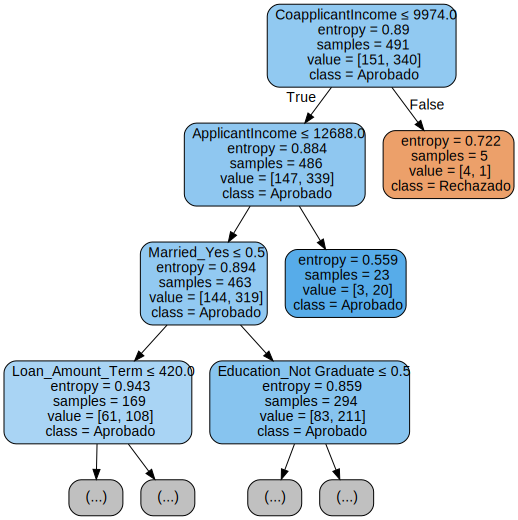

In [77]:
# Dibujar el árbol de decisión
from sklearn.tree import export_graphviz
import graphviz  

dot_data = export_graphviz(clf1, out_file=None, rounded=True, filled=True, special_characters=True, max_depth=3, 
                           feature_names=X.columns, class_names=['Rechazado', 'Aprobado'])

graph = graphviz.Source(dot_data, format='png') 
graph

##### Ajustar el modelo de bosque aleatorio

In [66]:
# Definir una malla de parámetros
param_grid = { 
    'n_estimators': [50, 100, 250, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : np.arange(3, 15),
    'criterion' :['gini', 'entropy']
}

In [67]:
# Buscar los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=99)
grid = GridSearchCV(clf2, param_grid, cv=5, scoring='average_precision', n_jobs=-1, verbose=1, return_train_score=True)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 250, 500]},
             return_train_score=True, scoring='average_precision', verbose=1)

In [68]:
# Ver el resultado del mejor modelo
print('Precisión: %.2f%%' % (grid.best_score_*100))
print(grid.best_params_)

Precisión: 86.95%
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}


In [69]:
# Entrenar el modelo
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, max_features='sqrt', random_state=99)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=99)

In [70]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_pred = clf2.predict(X_test)
print('Precisión: %.2f%%' % (accuracy_score(y_test, y_pred)*100))
print('Precisión balanceada: %.2f%%' % (balanced_accuracy_score(y_test, y_pred)*100))

Precisión: 75.61%
Precisión balanceada: 65.24%


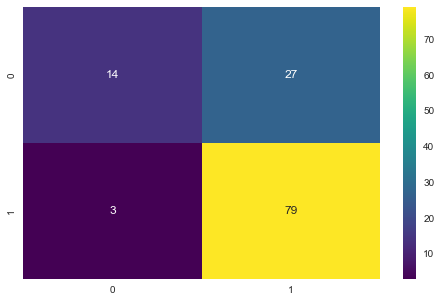

In [71]:
# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.show()

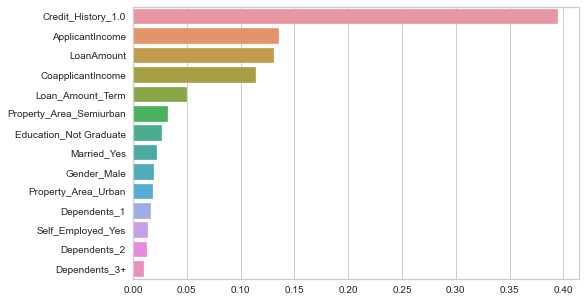

In [72]:
# Graficar la importancia de las variables
weights = pd.Series(clf2.feature_importances_, index=X.columns)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=weights.values, y=weights.index, ax=ax, order=weights.sort_values(ascending=False).index);

c:\Users\frpm0\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


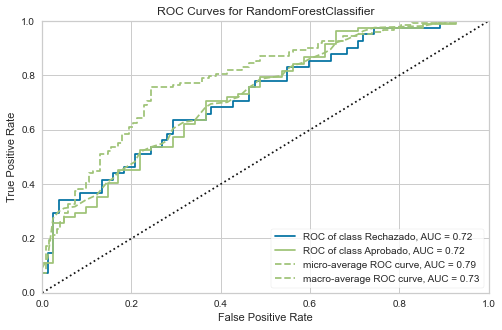

In [73]:
# Graficar la curva ROC
from yellowbrick import ROCAUC

fig, ax = plt.subplots(figsize=(8, 5))
visualizer = ROCAUC(clf2, classes=['Rechazado', 'Aprobado'], ax=ax)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();